In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/sample_data/mcdonalds.csv")
MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)

<Figure size 800x600 with 0 Axes>

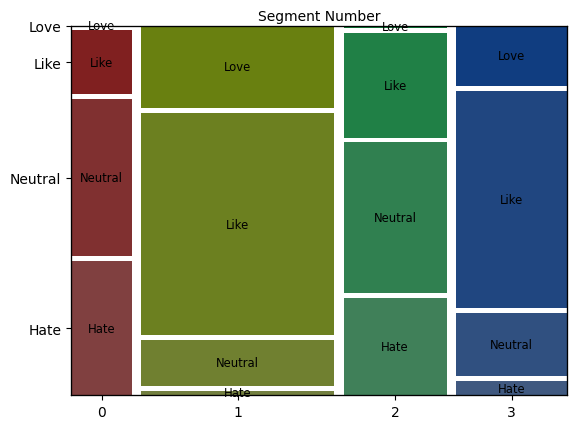

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(MD_x)

df["Like"] = pd.to_numeric(df["Like"], errors="coerce")
df["Like_Category"] = pd.cut(df["Like"], bins=[-6, -3, 0, 3, 6], labels=["Hate", "Neutral", "Like", "Love"])
contingency_table = pd.crosstab(df["Cluster"], df["Like_Category"])

plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), gap=0.02, title="", labelizer=lambda k: f"{k[1]}")
plt.xlabel("Segment Number")
plt.ylabel("Like Ratings")
plt.show()

<Figure size 800x600 with 0 Axes>

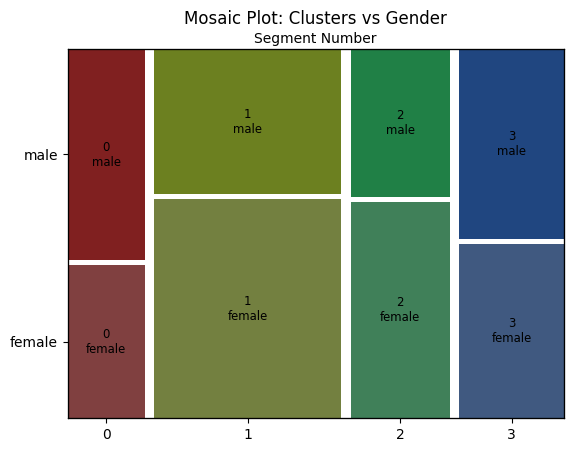

In [20]:
gender_column = df["Gender"].str.strip().str.lower()
contingency_table = pd.crosstab(df["Cluster"], gender_column)

plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), gap=0.02, title="Mosaic Plot: Clusters vs Gender")

plt.xlabel("Segment Number")
plt.ylabel("Gender")
plt.show()

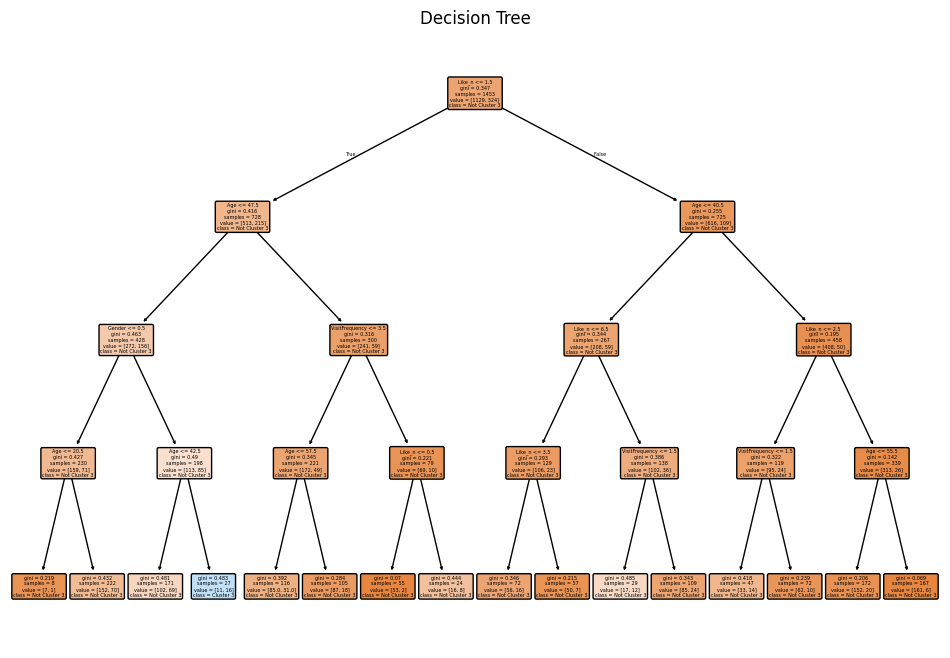

In [18]:
df["Cluster_3"] = (df["Cluster"] == 3).astype(int)
features = ["Like_n", "Age", "VisitFrequency", "Gender"]
df["Like_n"] = 6 - df["Like"].astype("category").cat.codes

df_encoded = df[features].copy()
df_encoded["Gender"] = LabelEncoder().fit_transform(df_encoded["Gender"])
df_encoded["VisitFrequency"] = LabelEncoder().fit_transform(df_encoded["VisitFrequency"])

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(df_encoded, df["Cluster_3"])

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=["Not Cluster 3", "Cluster 3"], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()